# Koala Kubs CIS520 Final Project: Support Vector Machine Models
SVM models for predicting diabetes status. *how to handle class imbalance? uneven margins?*

In [ ]:
# Import required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_validate

In [ ]:
##### Import data #####
from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/Shareddrives/CIS520 Final Project/dataset/pre_processed/'

##### Split into train/test sets #####
# "DIABETE3" is diabetes status; drop since it is output
# "_TOTINDA" is defined by "EXERANY2" (any exercise), which is already in features
# train/test is pd df while X/y are np arrays
train = pd.read_csv(data_path + 'Train.csv')
X_train = train.drop(['DIABETE3','_TOTINDA'], axis = 1).values
y_train = train['DIABETE3'].values.astype('int64')

test = pd.read_csv(data_path + 'Test.csv')
X_test = test.drop(['DIABETE3','_TOTINDA'], axis = 1).values
y_test = test['DIABETE3'].values.astype('int64')

Mounted at /content/gdrive


In [ ]:
##### Helper functions #####
##### Helper functions #####
# Evaluate model performance
def eval_model(model, X, y, run_kfold=True, kfold=5):
  ### Input:
  # model: untrained classifier predicting diabetic status
  # X: (n, 22) np.array of (samples x features)
  # y: (n, 1) np.array of diabetes status (0: non-diabetic, 1: diabetic)
  # run_kfold: boolean for whether to run k-fold cross-validation (default: True)
  # kfold: integer number of folds if using cross-validation on training set (default: 5)
  # thresh: float threshold if evaluating model on test set (default: 0.5)

  ### Output:
  # acc: (kfold,1) vector of accuracies
  # f1: (kfold,1) vector of F1-scores
  # prec: (kfold,1) vector of precision scors
  # recall: (kfold,1) vector of recall scores

  # K-fold CV on training set
  if run_kfold:
    scores = cross_validate(model, X, y, 
                            scoring=['accuracy','f1','precision','recall'], cv=kfold)
    acc = scores['test_accuracy']
    f1 = scores['test_f1']
    prec = scores['test_precision']
    recall = scores['test_recall']

    # Report summary metric scores
    print('%d-fold Mean Accuracy: %.3f' % (kfold, np.mean(acc)) )
    print('%d-fold Mean F1-score: %.3f' % (kfold, np.mean(f1)))
    print('%d-fold Mean Precision: %.3f' % (kfold, np.mean(prec)) )
    print('%d-fold Mean Recall: %.3f' % (kfold, np.mean(recall)) )
  
  # Evaluate model on test set (ie. without CV)
  else:
    # Get predictions adjusted for given class weight threshold
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    prec = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    # Report summary metric scores
    print('Accuracy: %.3f' % acc )
    print('F1-score: %.3f' % f1 )
    print('Precision: %.3f' % prec )
    print('Recall: %.3f' % recall )
    
  return acc, f1, prec, recall

# Visualize confusion matrix
def conf_mat(model, X, y):
  ### Input:
  # y: (n, 1) np.array of true diabetes status (0: non-diabetic, 1: diabetic)
  # y_hat: (n, 1) np.array of predicted diabetes status

  ### Output:
  # score: F1-score for displayed confusion matrix

  # Confusion matrix
  y_hat = model.predict(X)
  conf_mat = confusion_matrix(y, y_hat, labels=[1,0])
  disp = ConfusionMatrixDisplay(conf_mat, display_labels=["Diabetic","Non-Diabetic"])
  disp.plot()
  plt.show()

  # Compute F1-score for confusion matrix
  score = f1_score(y, y_hat)
  print('F1-score for the confusion matrix: %f' % score)

  return score

In [ ]:
print(test.shape)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = train.select_dtypes(include=numerics)
print(newdf.shape)

(33878, 24)
(135508, 24)


In [ ]:
# Fit model to training data
# %time model.fit(X_train, y_train)

CPU times: user 1h 53min 10s, sys: 18 s, total: 1h 53min 28s
Wall time: 1h 52min 56s


SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Define model
model = SVC(kernel='linear', class_weight="balanced")

# Evaluate model on training data using 5-fold CV, find optimal threshold
print("\n Mean evaluation metrics for 5-fold cross validation are:")
acc, f1, prec, recall = eval_model(model, X_train, y_train)

# Confusion Matrix for training data
print('\n Confusion matrix for training data')
score = conf_mat(model, X_train, y_train)


 Mean evaluation metrics for 5-fold cross validation are:
5-fold Mean Accuracy: 0.703
5-fold Mean F1-score: 0.458
5-fold Mean Precision: 0.330
5-fold Mean Recall: 0.747

 Confusion matrix for training data


NotFittedError: ignored

Accuracy: 0.705
F1-score: 0.458
Precision: 0.331
Recall: 0.743

 Confusion matrix for test data


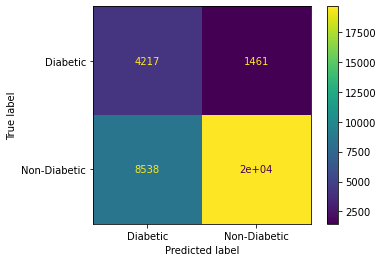

F1-score for the confusion matrix: 0.457549


In [ ]:
# Evaluate model on test data
acc, f1, prec, recall = eval_model(model, X_test, y_test, run_kfold=False)

# Confusion Matrix for test data
print('\n Confusion matrix for test data')
score = conf_mat(model, X_test, y_test)

In [ ]:
##### Define SVM model #####
# Grid Search
param_grid = {'C': [1, 1e3, 1e6],
              'kernel': ['linear'],
              'class_weight': ["balanced"]}
grid = GridSearchCV(SVC(), param_grid)

%time grid.fit(X_train, y_train)
# print(grid.best_params_)

# svm_clfOpt = grid.best_estimator_
# y_pred = svm_clfOpt.predict(X_test)